# XGBoost Iris Classifier

In [2]:
# ----------------------------------------------
# filename xgboost_book1_iris_classifier
# purpose - learn XGBoost Classification by working with the Iris dataset
# Author - Craig D Murray
# version 1.0
# version history - 1.0 Initial script

## Import Support Modules

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

### Load Data

In [6]:
irisarray = datasets.load_iris()
# print(irisarray)

In [7]:
irisdata = pd.DataFrame (
    np.c_[irisarray['data'], irisarray['target']],
    columns = irisarray['feature_names'] + ['Species']
)

In [8]:
irisdata['Species'] = irisdata['Species'].astype(int)

In [9]:
irisdata.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
irisdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [11]:
irisdata.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
Species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [12]:
irisdata.shape

(150, 5)

## Exploratory Data Analysis

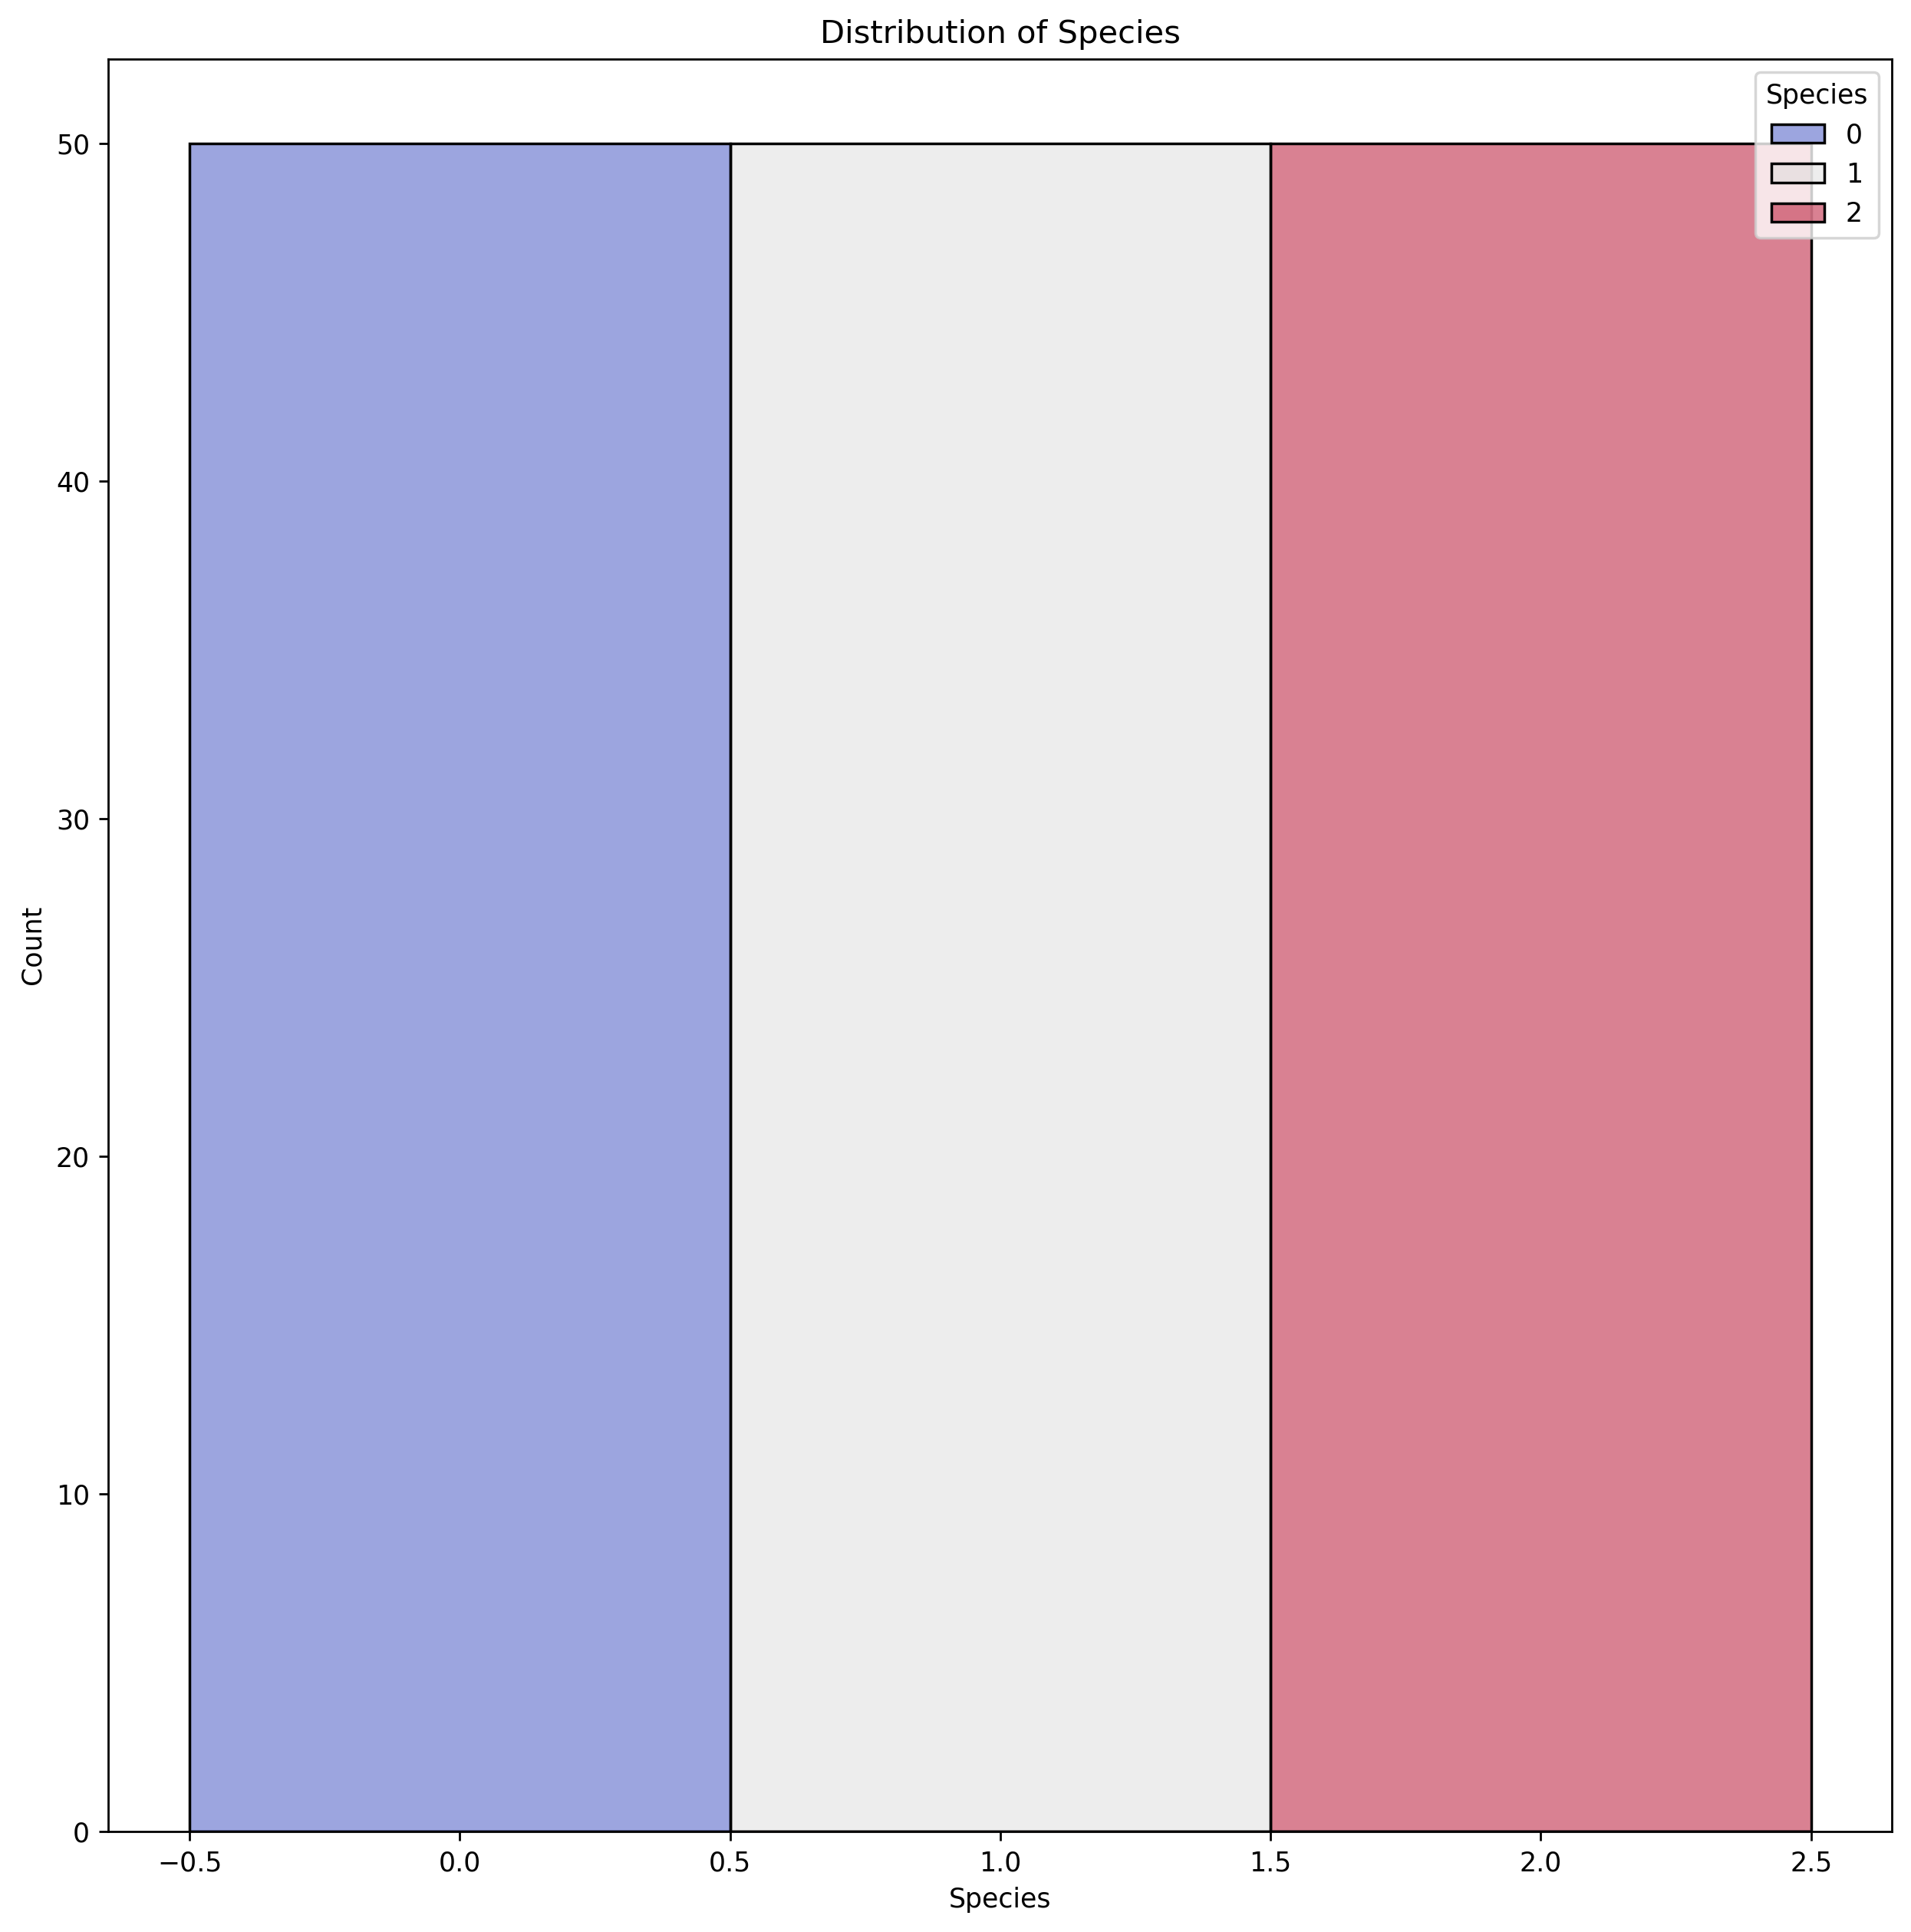

In [14]:
plt.figure(figsize=(12,12), dpi=250)
sns.histplot(data=irisdata, x='Species', hue='Species', discrete=True, palette="coolwarm")
plt.title("Distribution of Species")
plt.show()

''

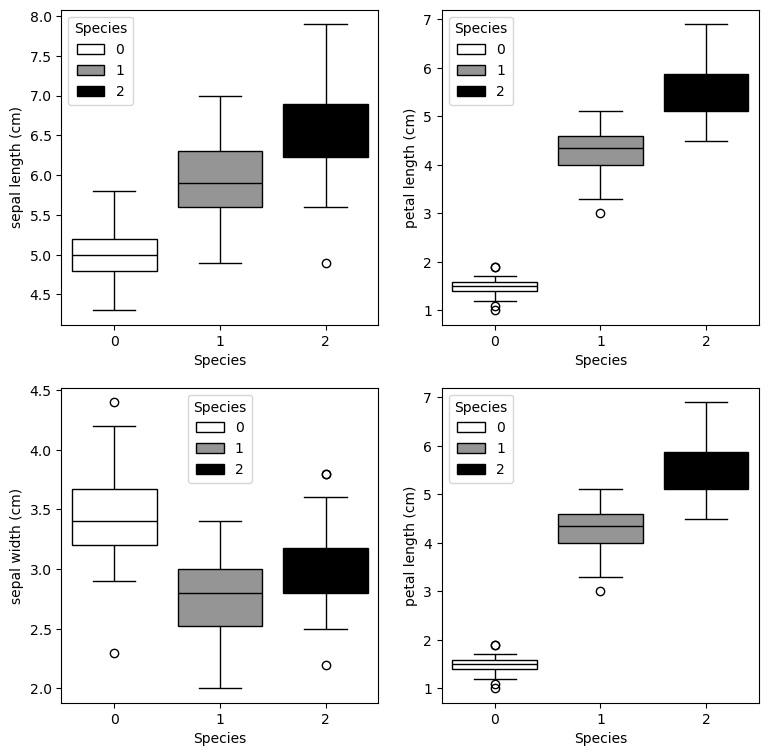

In [15]:
# ax=axes[row, column]:
fig, axes = plt.subplots(2,2, figsize=(9,9))
sns.boxplot(ax=axes[0,0], data=irisdata, 
           x="Species", y="sepal length (cm)", 
           palette="Greys", hue="Species")
sns.boxplot(ax=axes[0,1], data=irisdata, 
           x="Species", y="petal length (cm)", 
           palette="Greys", hue="Species")
sns.boxplot(ax=axes[1,0], data=irisdata, 
           x="Species", y="sepal width (cm)", 
           palette="Greys", hue="Species")
sns.boxplot(ax=axes[1,1], data=irisdata, 
           x="Species", y="petal length (cm)", 
           palette="Greys", hue="Species")
;

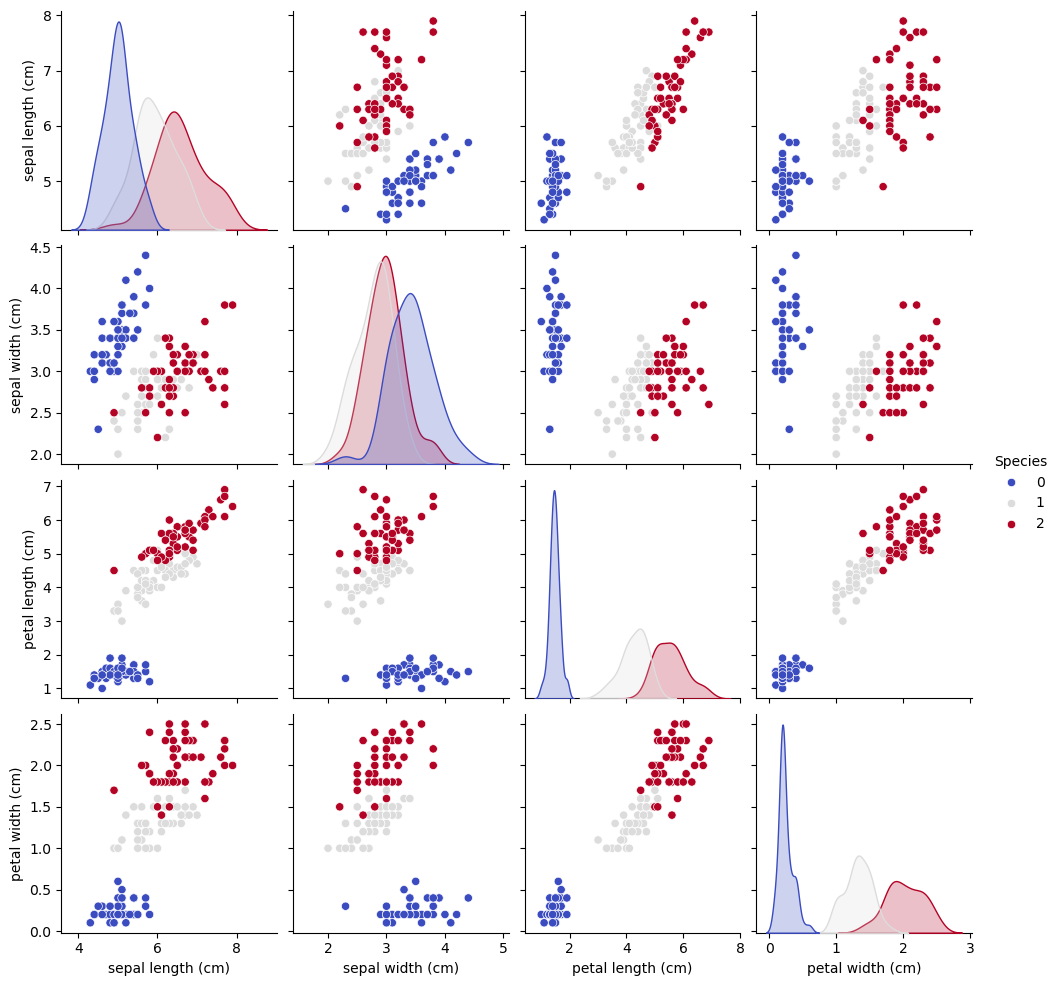

In [16]:
sns.pairplot(data=irisdata, hue="Species", palette="coolwarm");

<Axes: >

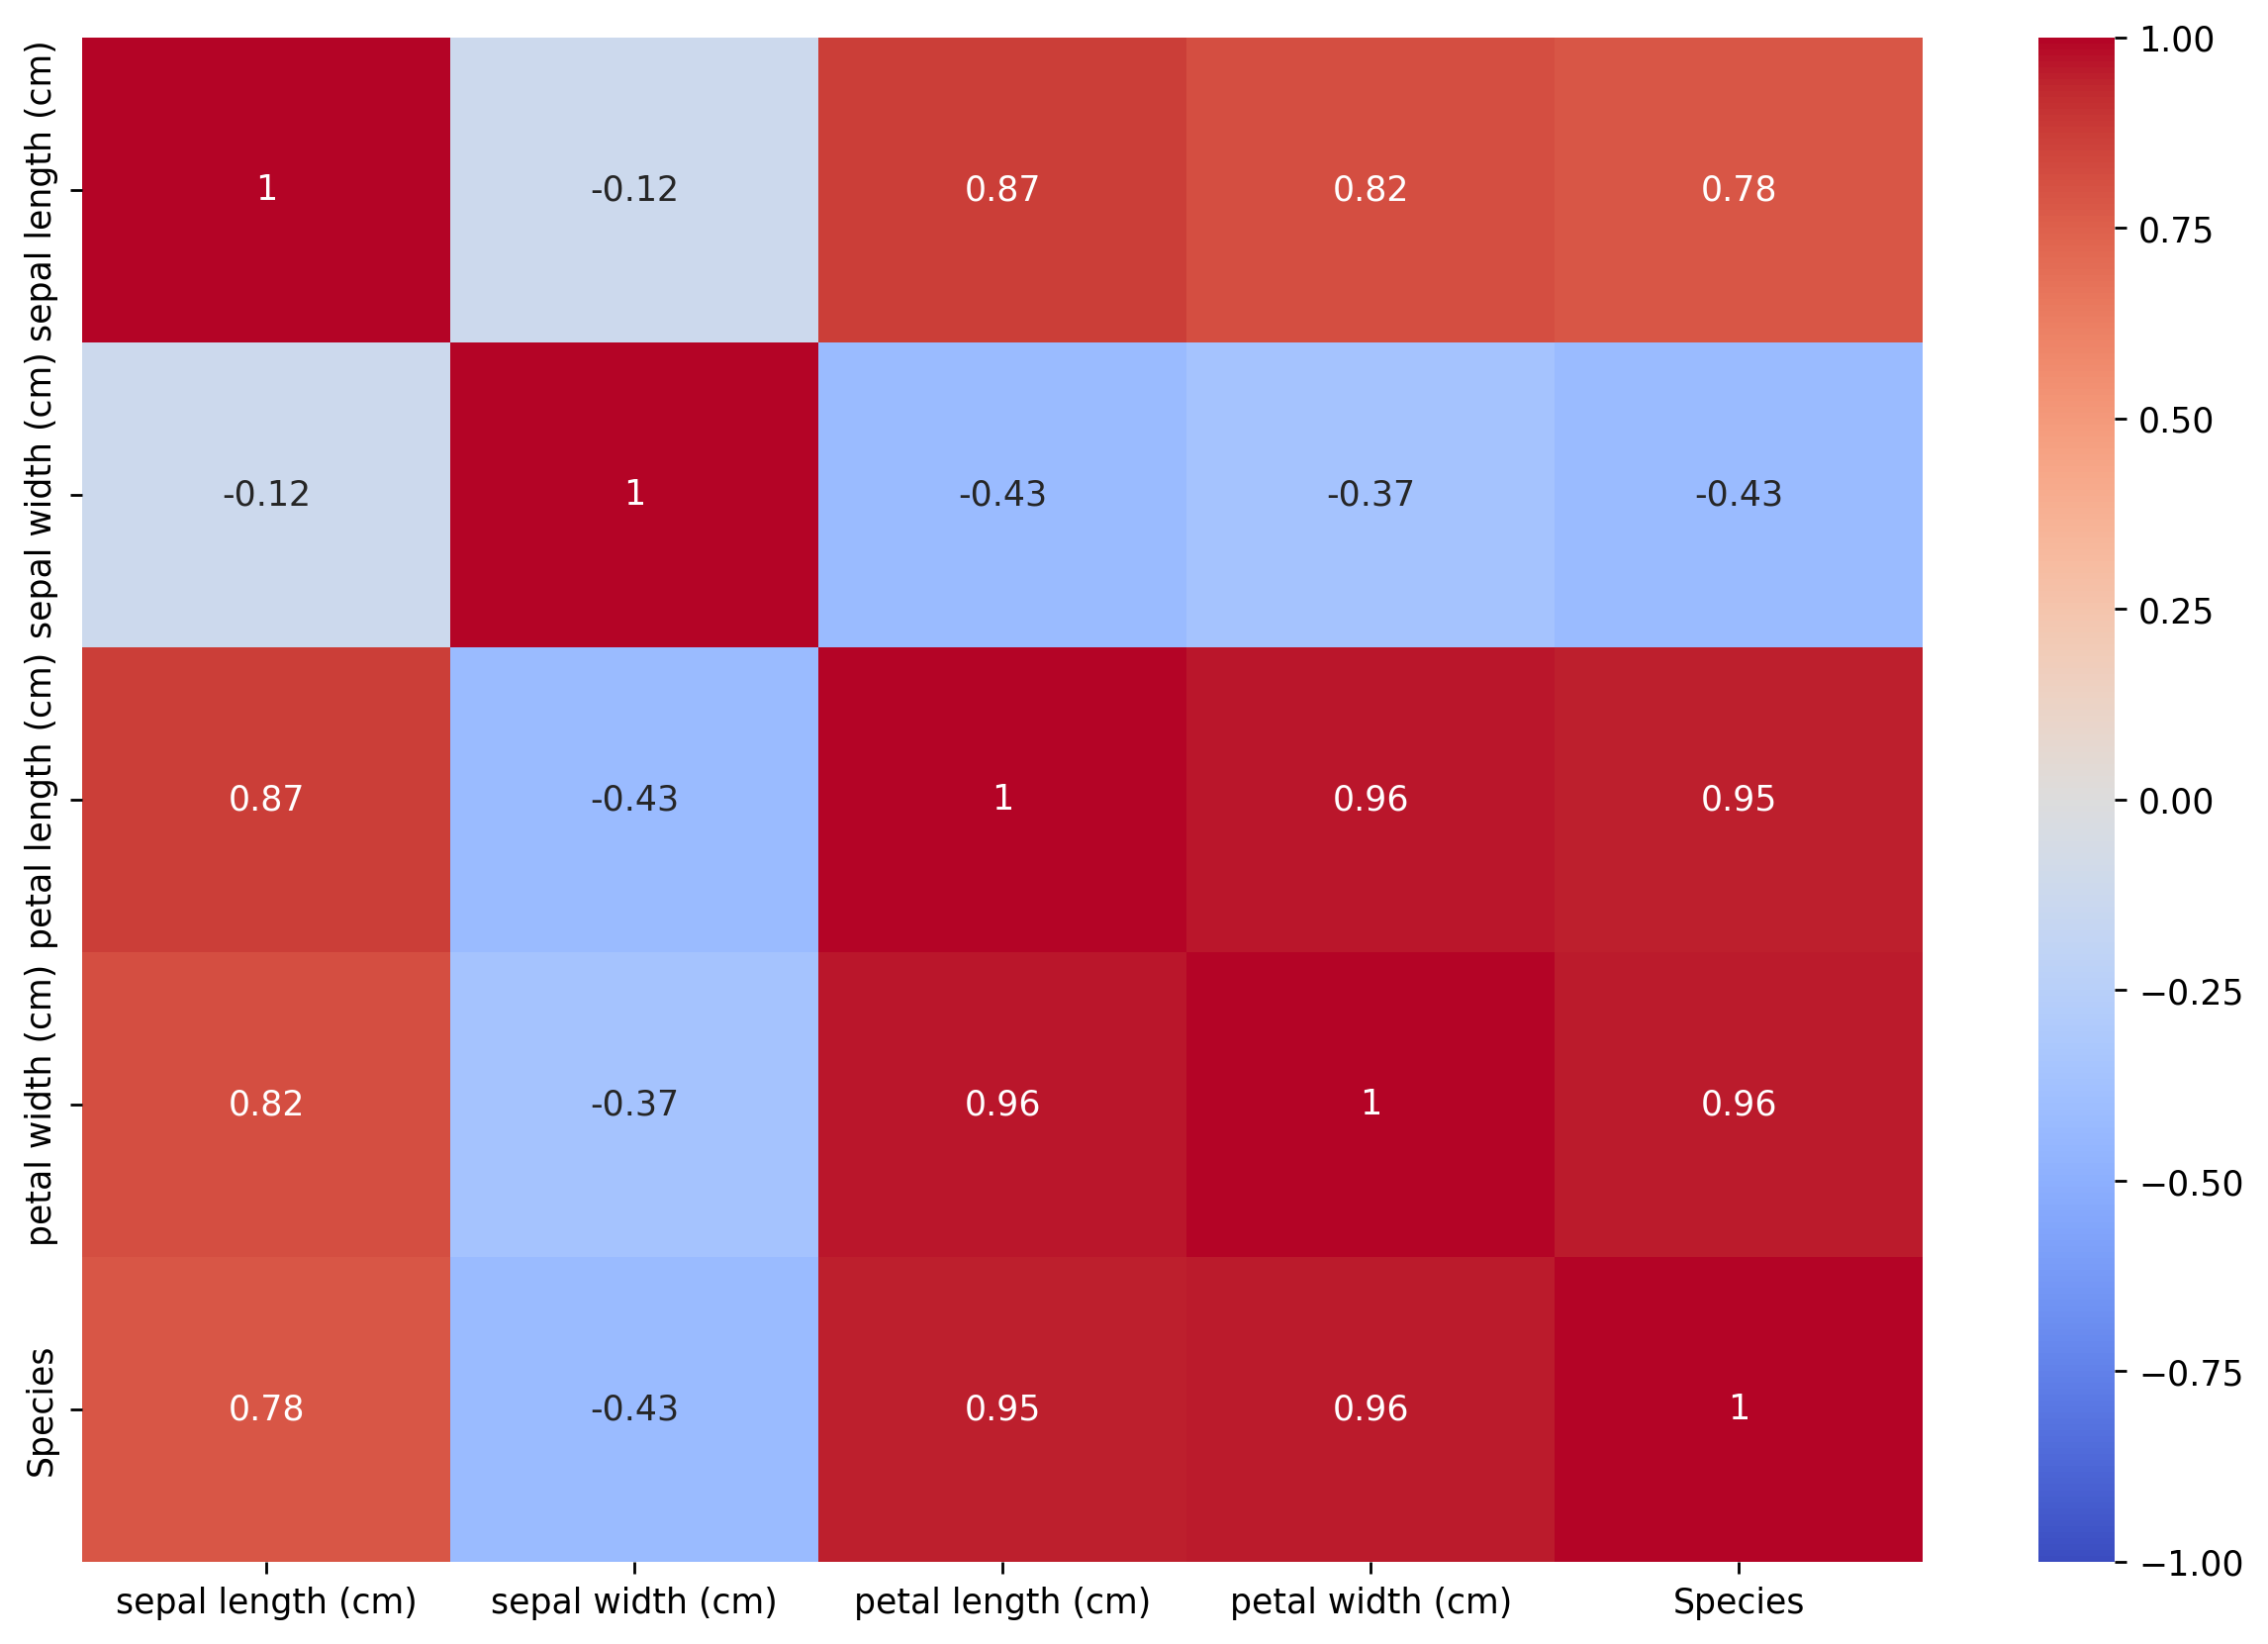

In [17]:
plt.figure(figsize=(12,8), dpi=250)
sns.heatmap(data=irisdata.corr(), cmap="coolwarm", vmax=1, vmin=-1, annot=True )

## Data Preparation

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
training_data, test_data = train_test_split(irisdata, test_size=0.2, random_state=11)

In [21]:
training_data.shape

(120, 5)

In [22]:
test_data.shape

(30, 5)

In [23]:
X_train = training_data.drop("Species", axis=1)
X_test = test_data.drop("Species", axis=1)

In [24]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
120,6.9,3.2,5.7,2.3
122,7.7,2.8,6.7,2.0
49,5.0,3.3,1.4,0.2
29,4.7,3.2,1.6,0.2


In [25]:
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
112,6.8,3.0,5.5,2.1
145,6.7,3.0,5.2,2.3
133,6.3,2.8,5.1,1.5
56,6.3,3.3,4.7,1.6
111,6.4,2.7,5.3,1.9


In [26]:
y_train = training_data[['Species']]
y_test = test_data[['Species']]

In [27]:
y_train.head()

,Species
0,0
120,2
122,2
49,0
29,0


In [28]:
y_test.head()

,Species
112,2
145,2
133,2
56,1
111,2


## Model Training

In [30]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

In [31]:
iris_classifier = xgb.XGBClassifier(eval_metric="auc")

In [32]:
iris_classifier.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)])

[0]	validation_0-auc:1.00000	validation_1-auc:0.99907
[1]	validation_0-auc:1.00000	validation_1-auc:0.99938
[2]	validation_0-auc:1.00000	validation_1-auc:0.99948
[3]	validation_0-auc:0.99649	validation_1-auc:0.99938
[4]	validation_0-auc:1.00000	validation_1-auc:0.99959
[5]	validation_0-auc:1.00000	validation_1-auc:0.99979
[6]	validation_0-auc:1.00000	validation_1-auc:0.99979
[7]	validation_0-auc:1.00000	validation_1-auc:1.00000
[8]	validation_0-auc:1.00000	validation_1-auc:1.00000
[9]	validation_0-auc:1.00000	validation_1-auc:1.00000
[10]	validation_0-auc:1.00000	validation_1-auc:1.00000
[11]	validation_0-auc:1.00000	validation_1-auc:1.00000
[12]	validation_0-auc:1.00000	validation_1-auc:1.00000
[13]	validation_0-auc:1.00000	validation_1-auc:1.00000
[14]	validation_0-auc:1.00000	validation_1-auc:1.00000
[15]	validation_0-auc:1.00000	validation_1-auc:1.00000
[16]	validation_0-auc:1.00000	validation_1-auc:1.00000
[17]	validation_0-auc:1.00000	validation_1-auc:1.00000
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## Predict

In [34]:
y_score = iris_classifier.predict(X_test)
y_score

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1], dtype=int64)

In [35]:
X_example = np.array([4.5, 3.0, 1.5, 0.25])
X_example = X_example.reshape(1,4)
y_example = iris_classifier.predict(X_example)
print(y_example)

[0]


In [36]:
print(classification_report(y_test, y_score))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [37]:
conf = confusion_matrix(y_test, y_score)
print('Confusion Matrix \n', conf)

Confusion Matrix 
 [[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]


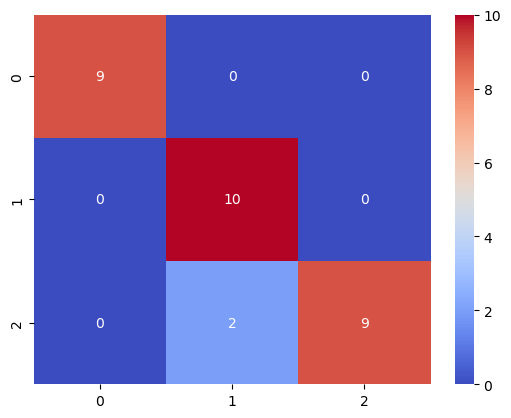

In [38]:
sns.heatmap(data=conf, cmap="coolwarm", annot=True);

In [39]:
# ConfusionMatrixDisplay.from_predictions(y_test, y_score)